# Stock Market Analysis

### Problem Link : https://www.kaggle.com/daiearth22/uniqlo-fastretailing-stock-price-prediction/data

#### Necessary Import Statements

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import Series
from pandas import DataFrame
from pandas import concat

# Train test split
from sklearn.model_selection import TimeSeriesSplit


# Models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Model evaluators
from sklearn.metrics import f1_score,confusion_matrix

### Reading the Train Data

In [2]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
Date             1226 non-null object
Open             1226 non-null int64
High             1226 non-null int64
Low              1226 non-null int64
Close            1226 non-null int64
Volume           1226 non-null int64
Stock Trading    1226 non-null int64
dtypes: int64(6), object(1)
memory usage: 67.1+ KB


In [3]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [4]:
train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


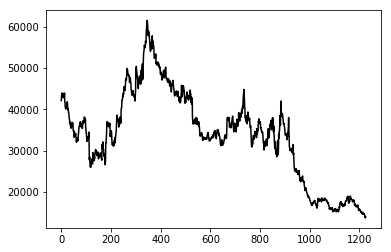

In [5]:
train['Open'].plot(color='k')

In [6]:
 train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


Seperating the DateTime field to data, month and year into different columns.

In [7]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day

In [8]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day
0,2016-12-30,42120,42330,41700,41830,610000,25628028000,2016,12,30
1,2016-12-29,43000,43220,42540,42660,448400,19188227000,2016,12,29
2,2016-12-28,43940,43970,43270,43270,339900,14780670000,2016,12,28
3,2016-12-27,43140,43700,43140,43620,400100,17427993000,2016,12,27
4,2016-12-26,43310,43660,43090,43340,358200,15547803000,2016,12,26


Function for dropping of unnecesary features or redundant features

In [9]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [10]:
drop_features(['Date'],train)

### Applying the TimeSeries Feature Engineering
#### Lag Features

In [11]:
#Applying Lag Features to Opening Price
open1 = Series(train['Open'])
open_dataframe = concat([open1.shift(-3), open1.shift(-2), open1.shift(-1)], axis=1)
open_dataframe.columns = ['O_t-3', 'O_t-2', 'O_t-1']
open_dataframe.shape

(1226, 3)

In [12]:
open_dataframe.head()

,O_t-3,O_t-2,O_t-1
0,43140.0,43940.0,43000.0
1,43310.0,43140.0,43940.0
2,43660.0,43310.0,43140.0
3,43900.0,43660.0,43310.0
4,42910.0,43900.0,43660.0


In [13]:
#combining the train data and the lag features of Temp
train1 = pd.concat([train, open_dataframe], axis=1)

In [14]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1
0,42120,42330,41700,41830,610000,25628028000,2016,12,30,43140.0,43940.0,43000.0
1,43000,43220,42540,42660,448400,19188227000,2016,12,29,43310.0,43140.0,43940.0
2,43940,43970,43270,43270,339900,14780670000,2016,12,28,43660.0,43310.0,43140.0
3,43140,43700,43140,43620,400100,17427993000,2016,12,27,43900.0,43660.0,43310.0
4,43310,43660,43090,43340,358200,15547803000,2016,12,26,42910.0,43900.0,43660.0


In [15]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0
1223,13990,14030,13790,13850,765500,10635609000,2012,1,6,NaN,14050.0,13720.0
1224,13720,13840,13600,13800,511500,7030811000,2012,1,5,NaN,NaN,14050.0
1225,14050,14050,13700,13720,559100,7719804000,2012,1,4,NaN,NaN,NaN


In [16]:
#Applying Lag Features to Opening Price
close_vals = Series(train['Close'])
close_dataframe = concat([close_vals.shift(-3), close_vals.shift(-2), close_vals.shift(-1)], axis=1)
close_dataframe.columns = ['C_t-3', 'C_t-2', 'C_t-1']
close_dataframe.shape

(1226, 3)

In [17]:
#combining the train data and the lag features of Temp
train1 = pd.concat([train1, close_dataframe], axis=1)

In [18]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
0,42120,42330,41700,41830,610000,25628028000,2016,12,30,43140.0,43940.0,43000.0,43620.0,43270.0,42660.0
1,43000,43220,42540,42660,448400,19188227000,2016,12,29,43310.0,43140.0,43940.0,43340.0,43620.0,43270.0
2,43940,43970,43270,43270,339900,14780670000,2016,12,28,43660.0,43310.0,43140.0,43480.0,43340.0,43620.0
3,43140,43700,43140,43620,400100,17427993000,2016,12,27,43900.0,43660.0,43310.0,44000.0,43480.0,43340.0
4,43310,43660,43090,43340,358200,15547803000,2016,12,26,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0


In [19]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0
1223,13990,14030,13790,13850,765500,10635609000,2012,1,6,NaN,14050.0,13720.0,NaN,13720.0,13800.0
1224,13720,13840,13600,13800,511500,7030811000,2012,1,5,NaN,NaN,14050.0,NaN,NaN,13720.0
1225,14050,14050,13700,13720,559100,7719804000,2012,1,4,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#dropping null value rows
train1.dropna(inplace = True)

In [21]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
1218,14610,14670,14530,14610,360100,5255652000,2012,1,16,14360.0,14520.0,14740.0,14590.0,14520.0,14770.0
1219,14740,14780,14450,14770,1543700,22669096000,2012,1,13,13890.0,14360.0,14520.0,14390.0,14590.0,14520.0
1220,14520,14600,14330,14520,540500,7814121000,2012,1,12,13990.0,13890.0,14360.0,13850.0,14390.0,14590.0
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0


In [22]:
train1.shape

(1223, 15)

In [23]:
#since for combining of data, both should have same number of rows. hence, removing the extra row
#train1.drop(train1.head(1).index, inplace=True)
#train1.shape

#### Rolling Window Statistics

In [39]:
# Appling window Features for the Highest Value Feature
high = train['High']
w = 3

In [43]:
shift = high.shift(-w+1)

In [44]:
train['High'].head()

0    42330
1    43220
2    43970
3    43700
4    43660
Name: High, dtype: int64

In [45]:
shift.head()

0    43970.0
1    43700.0
2    43660.0
3    43840.0
4    44370.0
Name: High, dtype: float64

In [46]:
window = shift.rolling(window=w)


In [47]:
type(window)

pandas.core.window.Rolling

In [48]:
window.min().head()

0        NaN
1        NaN
2    43660.0
3    43660.0
4    43660.0
Name: High, dtype: float64

In [49]:
df = concat([window.min(), window.mean(), window.max(), high], axis=1)
df.columns = ['min', 'mean', 'max', 'high']

In [50]:
df.head()

,min,mean,max,high
0,NaN,NaN,NaN,42330
1,NaN,NaN,NaN,43220
2,43660.0,43776.666667,43970.0,43970
3,43660.0,43733.333333,43840.0,43700
4,43660.0,43956.666667,44370.0,43660


In [51]:
#dropping null values
df.dropna(inplace = True)
df.shape

(1222, 4)

In [52]:
#combining the train1 and the rolling window features
train2 = pd.concat([train1, df], axis=1)

In [53]:
train2.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,high
0,42120.0,42330.0,41700.0,41830.0,610000.0,2.562803e+10,2016.0,12.0,30.0,43140.0,43940.0,43000.0,43620.0,43270.0,42660.0,NaN,NaN,NaN,NaN
1,43000.0,43220.0,42540.0,42660.0,448400.0,1.918823e+10,2016.0,12.0,29.0,43310.0,43140.0,43940.0,43340.0,43620.0,43270.0,NaN,NaN,NaN,NaN
2,43940.0,43970.0,43270.0,43270.0,339900.0,1.478067e+10,2016.0,12.0,28.0,43660.0,43310.0,43140.0,43480.0,43340.0,43620.0,43660.0,43776.666667,43970.0,43970.0
3,43140.0,43700.0,43140.0,43620.0,400100.0,1.742799e+10,2016.0,12.0,27.0,43900.0,43660.0,43310.0,44000.0,43480.0,43340.0,43660.0,43733.333333,43840.0,43700.0
4,43310.0,43660.0,43090.0,43340.0,358200.0,1.554780e+10,2016.0,12.0,26.0,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0,43660.0,43956.666667,44370.0,43660.0


In [54]:
#Dropping the High feature(redundant)
drop_features(['High'],train2)

In [55]:
train2.tail()

,Open,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,high
1219,14740.0,14450.0,14770.0,1543700.0,2.266910e+10,2012.0,1.0,13.0,13890.0,14360.0,14520.0,14390.0,14590.0,14520.0,14600.0,14710.000000,14780.0,14780.0
1220,14520.0,14330.0,14520.0,540500.0,7.814121e+09,2012.0,1.0,12.0,13990.0,13890.0,14360.0,13850.0,14390.0,14590.0,14390.0,14580.000000,14750.0,14600.0
1221,14360.0,14280.0,14590.0,1043400.0,1.519199e+10,2012.0,1.0,11.0,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0,14030.0,14390.000000,14750.0,14750.0
1222,13890.0,13860.0,14390.0,952300.0,1.353341e+10,2012.0,1.0,10.0,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0,13840.0,14086.666667,14390.0,14390.0
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13840.0,13973.333333,14050.0,14030.0


#### Expanding window Statistics

In [56]:
train2.dropna(inplace=True)

In [57]:
#Applying Expanding window for the Lowest Value
low= train['Low']
window = low.expanding()
dfc = concat([window.min(), window.mean(), window.max(), low.shift(-1),low], axis=1)
dfc.columns = ['min', 'mean', 'max', 't+1','low']

In [58]:
#no null values
dfc.shape

(1226, 5)

In [ ]:
#to make it equal to the train2, dropping forst 4 values
#dfc.drop(dfc.head(4).index, inplace=True)

In [59]:
dfc.shape

(1226, 5)

In [60]:
#concating the expanding window features to the previous train2.
train_final = pd.concat([train2, dfc], axis=1)
#Dropping the CO2 feature(redundant)
drop_features(['Low'],train_final)

In [62]:
train_final.tail()

,Open,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,...,C_t-1,min,mean,max,high,min,mean,max,t+1,low
1221,14360.0,14590.0,1043400.0,1.519199e+10,2012.0,1.0,11.0,13720.0,13990.0,13890.0,...,14390.0,14030.0,14390.000000,14750.0,14750.0,14280.0,33412.094926,60740.0,13860.0,14280
1222,13890.0,14390.0,952300.0,1.353341e+10,2012.0,1.0,10.0,14050.0,13720.0,13990.0,...,13850.0,13840.0,14086.666667,14390.0,14390.0,13860.0,33396.107931,60740.0,13790.0,13860
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13790.0,33380.089869,60740.0,13600.0,13790
1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13600.0,33363.942857,60740.0,13700.0,13600
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13600.0,33347.903752,60740.0,NaN,13700


In [63]:
#Replacing the null values with -1 if any.
train_final.dropna(inplace = True)

In [64]:
#Complete final Train Data
train_final.shape

(1221, 22)

### Splitting of Data

In [67]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(train_final.drop('Close',axis=1)
                                                 ,train_final['Close'],random_state=42)

In [73]:
X_train.head()

,Open,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,...,C_t-1,min,mean,max,high,min,mean,max,t+1,low
138,30260.0,505800.0,1.519876e+10,2016.0,6.0,9.0,29420.0,30050.0,30030.0,30090.0,...,30450.0,30190.0,30380.000000,30500.0,30500.0,25305.0,34828.884892,43610.0,29810.0,29855
1011,17050.0,595300.0,1.012456e+10,2012.0,11.0,9.0,17420.0,17480.0,17220.0,17340.0,...,17140.0,17170.0,17346.666667,17530.0,17170.0,16620.0,36870.484190,60740.0,17040.0,16870
961,22690.0,480700.0,1.102247e+10,2013.0,1.0,29.0,22470.0,23050.0,23380.0,22550.0,...,22940.0,23130.0,23263.333333,23450.0,23130.0,22650.0,37746.694387,60740.0,22900.0,22650
5,43660.0,381600.0,1.658649e+10,2016.0,12.0,22.0,42790.0,42910.0,43900.0,43130.0,...,44000.0,43630.0,43946.666667,44370.0,43840.0,41700.0,42821.666667,43270.0,43610.0,43190
715,38670.0,939400.0,3.614092e+10,2014.0,1.0,30.0,37150.0,37895.0,38830.0,37600.0,...,39360.0,38130.0,38773.333333,39375.0,38815.0,25305.0,39266.662011,60740.0,38700.0,37980


### Applying Regressor Model

In [74]:
model=RandomForestRegressor()

In [75]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
predict=model.predict(X_test)

In [85]:
imp_list = list(model.feature_importances_)

In [86]:
col_lis = list(X_test.columns)

In [100]:
feature_importances = {i[0]:"{0:.4f}".format(i[1]) for i in list(zip(col_lis,imp_list))}

In [101]:
feature_importances

{'C_t-1': '0.0008',
 'C_t-2': '0.0001',
 'C_t-3': '0.0001',
 'Day': '0.0000',
 'Month': '0.0000',
 'O_t-1': '0.0083',
 'O_t-2': '0.0033',
 'O_t-3': '0.0001',
 'Open': '0.0022',
 'Stock Trading': '0.0000',
 'Volume': '0.0000',
 'Year': '0.0000',
 'high': '0.5258',
 'low': '0.4311',
 'max': '0.0000',
 'mean': '0.0000',
 'min': '0.0042',
 't+1': '0.0011'}

#### Measuring the Score. (Evaluation Metrics)

In [102]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 303.039215686
MSE: 195428.444444
RMSE: 442.072894944


In [104]:
from sklearn.cross_validation import cross_val_score

print(cross_val_score(model, X_test, y_test,cv=3))

[ 0.98884707  0.99646072  0.99736723]
